## SABR Model for the Implied Volatility Smile

Detailed SABR Model Implementatio
The SABR model is defined by the following stochastic differential equations (SDEs):

$$
\begin{aligned}
    dF_t &= \sigma_t F_t^\beta \, dW_{t}^1, \\
    d\sigma_t &= \nu \sigma_t \, dW_{t}^2, \\
    d\langle W^1, W^2 \rangle_t &= \rho \, dt,
\end{aligned}
$$

where 𝑊𝑡  and 𝑍𝑡 are two correlated Wiener processes with correlation coefficient 𝜌

### 1.Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

In [9]:
# SABR model parameters
def sabr_volatility(F, K, T, alpha, beta, rho, nu):
    K = max(K, 1e-12)
    if F == K:
        return alpha * F**(beta - 1)
    
    z = nu / alpha * (F * K)**((1 - beta) / 2) * np.log(F / K)
    x_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
    
    factor1 = alpha / ((F * K)**((1 - beta) / 2) * (1 + (1 - beta)**2 / 24 * (np.log(F / K))**2 + 
                                                    (1 - beta)**4 / 1920 * (np.log(F / K))**4))
    
    factor2 = z / x_z if x_z != 0 else 1
    
    volatility = factor1 * factor2
    return volatility

In [10]:
# SABR model calibration objective function
def sabr_objective(params, F, K, T, market_vols):
    alpha, beta, rho, nu = params
    model_vols = np.array([sabr_volatility(F, k, T, alpha, beta, rho, nu) for k in K])
    return np.sum((model_vols - market_vols) ** 2)

# Calibration function to fit the SABR model to market data
def calibrate_sabr(F, K, T, market_vols):
    initial_guess = [0.2, 0.5, 0.0, 0.3]
    bounds = [(0.001, 2.0), (0.0, 1.0), (-0.999, 0.999), (0.001, 2.0)]
    result = minimize(sabr_objective, initial_guess, args=(F, K, T, market_vols), bounds=bounds, method='L-BFGS-B')
    return result.x

In [11]:
# Visualization function for SABR implied volatility smile
def plot_sabr_volatility_surface(F, K, T, alpha, beta, rho, nu):
    implied_vols = np.array([sabr_volatility(F, k, T, alpha, beta, rho, nu) for k in K])
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, implied_vols, label=f'SABR Volatility (α={alpha:.2f}, β={beta:.2f}, ρ={rho:.2f}, ν={nu:.2f})')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.title('SABR Model Implied Volatility Smile')
    plt.legend()
    plt.show()

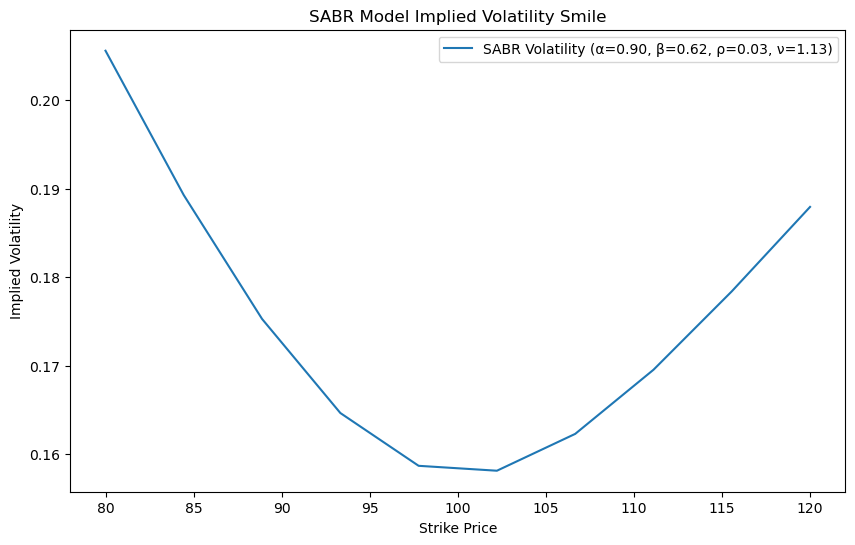

In [12]:
# Example usage: Market data simulation
F = 100  # Forward price
K = np.linspace(80, 120, 10)  # Range of strike prices
T = 1.0  # Time to maturity (1 year)
market_vols = np.array([0.20, 0.19, 0.18, 0.17, 0.16, 0.15, 0.16, 0.17, 0.18, 0.19])

# Calibrate SABR model to market data
alpha, beta, rho, nu = calibrate_sabr(F, K, T, market_vols)

# Plot the SABR volatility smile
plot_sabr_volatility_surface(F, K, T, alpha, beta, rho, nu)

### Explanation:

#### SABR Model Volatility Calculation:

The function sabr_volatility calculates the SABR implied volatility based on the given parameters using the approximation method.

##### Objective Function for Calibration:

The sabr_objective function computes the difference between the market implied volatilities and the SABR model volatilities. This difference is minimized during calibration.

#### Model Calibration:

The calibrate_sabr function uses the scipy.optimize.minimize method to find the optimal parameters (alpha, beta, rho, nu) that fit the SABR model to market data.

#### Visualization:

The plot_sabr_volatility_surface function plots the implied volatility smile, showcasing how the SABR model fits the market data across different strike prices.

### Visualization of Results

The final part of the code generates a plot that visually represents the implied volatility smile based on the calibrated SABR parameters. This plot is crucial for assessing how well the SABR model captures the volatility structure in the market.

Further Customization:
Surface Plot:

You can extend the visualization to create a 3D surface plot showing the implied volatility for different maturities and strikes.
Comparison with Market Data:

Overlay the market volatility data on the plot to directly compare the SABR model fit with actual market data.